In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey
import plotly.graph_objects as go

print(np.__version__)

/tmp/ipykernel_1496/2882533676.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


1.26.4


In [2]:
#%run data_preparation.ipynb
%run functions.ipynb

# Open all files / computing intensive
base_folder_path = '/workspaces/nyc_bike_rental//data'
start_year = 2015
end_year = 2019
cd = combine_csv_files_in_years(base_folder_path,start_year,end_year)

Cat = list(cd.columns)
for i in range(15):
  cd[Cat[i]] = cd[Cat[i]].fillna(cd[Cat[i+15]])
Bad_Cat = Cat[15:30]
cd = cd.drop(columns=Bad_Cat)

In [3]:
cd.columns
cd.tail()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
1354229,367.0,2019-02-21 12:05:05.2680,2019-02-21 12:11:13.2210,3694.0,Jackson Square,40.71113,-74.0789,3280.0,Astor Place,40.719282,-74.071262,26189.0,Subscriber,1983.0,1.0
1354230,497.0,2019-02-21 17:45:00.4510,2019-02-21 17:53:18.1580,3694.0,Jackson Square,40.71113,-74.0789,3679.0,Bergen Ave,40.722104,-74.071455,29296.0,Subscriber,1985.0,1.0
1354231,959.0,2019-02-25 06:17:31.9310,2019-02-25 06:33:31.4950,3694.0,Jackson Square,40.71113,-74.0789,3183.0,Exchange Place,40.716247,-74.033459,29673.0,Subscriber,1977.0,1.0
1354232,936.0,2019-02-26 06:14:45.4170,2019-02-26 06:30:21.8750,3694.0,Jackson Square,40.71113,-74.0789,3183.0,Exchange Place,40.716247,-74.033459,29672.0,Subscriber,1977.0,1.0
1354233,822.0,2019-02-26 15:45:20.5370,2019-02-26 15:59:02.6070,3694.0,Jackson Square,40.71113,-74.0789,3280.0,Astor Place,40.719282,-74.071262,26189.0,Subscriber,1983.0,2.0


In [4]:
# Extract year, date, hour, and time into separate columns
#cd['Start Time'] = pd.to_datetime(cd['Start Time'], format='%Y-%m-%d %H:%M:%S', errors='raise')
#print(cd['Start Time'].dt.year)
#cd['Date'] = cd['Start Time'].dt.date
#cd['Hour'] = cd['Start Time'].dt.hour
#cd['Time'] = cd['Start Time'].dt.time

first_4_chars = cd['Start Time'].str[:4]
#years = pd.to_numeric(first_4_chars, errors='coerce')
#time = cd['Start Time'].str[11:16].to_list()
cd['Years'] = pd.to_numeric(first_4_chars, errors='coerce')                                  # Will not add new Dataframe column.....
cd['Times'] = cd['Start Time'].str[11:16].to_list()
cd['Month'] = pd.to_numeric(cd['Start Time'].str[5:7], errors='coerce')  

#type(time)

In [5]:
cd.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,Years,Times,Month
0,2118.0,2015-12-01 00:49:31,2015-12-01 01:24:49,3199.0,Newport Pkwy,40.728745,-74.032108,3199.0,Newport Pkwy,40.728745,-74.032108,24497.0,Subscriber,1975.0,1.0,2015,00:49,12
1,267.0,2015-12-01 01:48:34,2015-12-01 01:53:02,3186.0,Grove St PATH,40.719586,-74.043117,3209.0,Brunswick St,40.724176,-74.050656,24543.0,Subscriber,1982.0,1.0,2015,01:48,12
2,119.0,2015-12-01 03:05:28,2015-12-01 03:07:27,3214.0,Essex Light Rail,40.712774,-74.036486,3183.0,Exchange Place,40.716247,-74.033459,24450.0,Subscriber,1983.0,1.0,2015,03:05,12
3,340.0,2015-12-01 05:37:09,2015-12-01 05:42:49,3203.0,Hamilton Park,40.727596,-74.044247,3202.0,Newport PATH,40.727224,-74.033759,24445.0,Subscriber,1970.0,1.0,2015,05:37,12
4,638.0,2015-12-01 05:50:32,2015-12-01 06:01:11,3207.0,Oakland Ave,40.737604,-74.052478,3185.0,City Hall,40.717732,-74.043845,24631.0,Subscriber,1984.0,2.0,2015,05:50,12


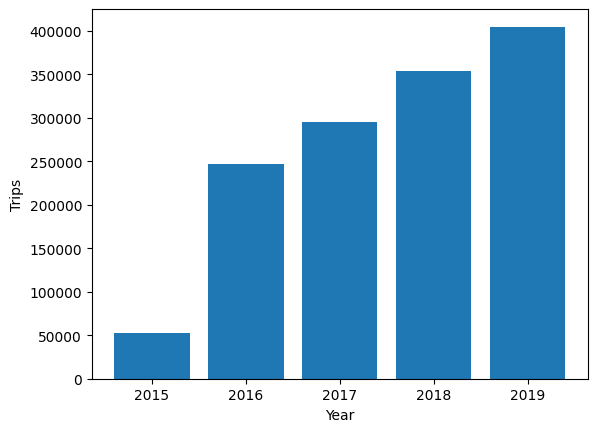

In [6]:
years_list = ['2015','2016','2017','2018','2019']
Trips = []
for y in years_list:
    test = cd[cd['Start Time'].str[:4] == y]
    Trips.append(len(test))

plt.bar(years_list, Trips)
plt.xlabel('Year')
plt.ylabel('Trips')
plt.show()

In [7]:

    test = cd[(cd['Start Time'].str[:4] == '2015') & (cd['Birth Year'] == 1977 )]
    test.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,Years,Times,Month
8,382.0,2015-12-01 06:06:29,2015-12-01 06:12:51,3207.0,Oakland Ave,40.737604,-74.052478,3195.0,Sip Ave,40.730743,-74.063784,24411.0,Subscriber,1977.0,1.0,2015,06:06,12
25,132.0,2015-12-01 07:38:05,2015-12-01 07:40:17,3213.0,Van Vorst Park,40.718489,-74.047727,3186.0,Grove St PATH,40.719586,-74.043117,24409.0,Subscriber,1977.0,1.0,2015,07:38,12
26,300.0,2015-12-01 07:40:52,2015-12-01 07:45:52,3203.0,Hamilton Park,40.727596,-74.044247,3186.0,Grove St PATH,40.719586,-74.043117,24541.0,Subscriber,1977.0,1.0,2015,07:40,12
28,299.0,2015-12-01 07:42:28,2015-12-01 07:47:28,3186.0,Grove St PATH,40.719586,-74.043117,3184.0,Paulus Hook,40.714145,-74.033552,24700.0,Subscriber,1977.0,1.0,2015,07:42,12
30,324.0,2015-12-01 07:48:38,2015-12-01 07:54:02,3207.0,Oakland Ave,40.737604,-74.052478,3215.0,Central Ave,40.746730,-74.049251,24447.0,Subscriber,1977.0,2.0,2015,07:48,12


In [141]:
#time by minutes - takes way to long.... see next box
times_uq = sorted(set(time))
times_short = times_uq[0:10]
times_count = []
for t in times_short:
    test = cd[cd['Start Time'].str[11:16] == t]
    times_count.append(len(test))
print(times_count)

[228, 256, 293, 349, 294, 254, 287, 261, 259, 235]


[10968, 5993, 3390, 2220, 3304, 13001, 38985, 91994, 158577, 82541, 53449, 52095, 59298, 59609, 56463, 59533, 73497, 125911, 139049, 99911, 68861, 46125, 31281, 18179]


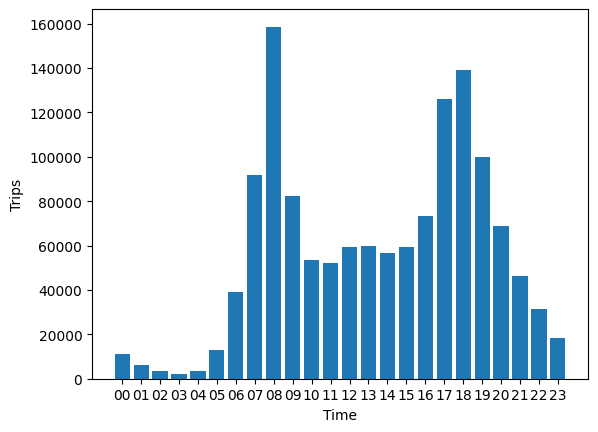

In [8]:
hours = cd['Start Time'].str[11:13].to_list()
hours_uq = sorted(set(hours))


hours_count = []
for t in hours_uq:
    test = cd[cd['Start Time'].str[11:13] == t]
    hours_count.append(len(test))
print(hours_count)

plt.bar(hours_uq, hours_count)
plt.xlabel('Time')
plt.ylabel('Trips')
plt.show()

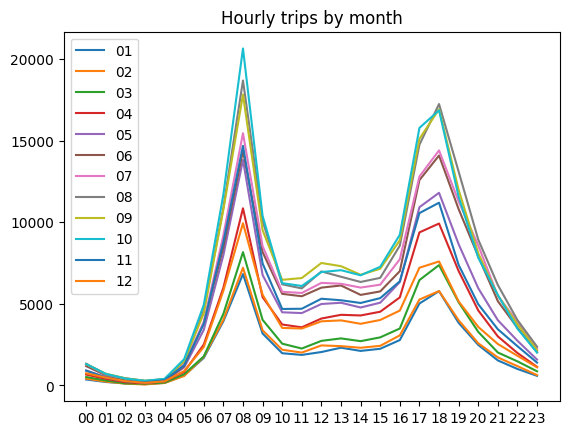

In [9]:
months = [ '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
plt.title('Hourly trips by month')
for m in months:
    hours_count = []
    for t in hours_uq:  
        test = cd[(cd['Start Time'].str[11:13] == t) & (cd['Start Time'].str[5:7] == m) ]
        hours_count.append(len(test))
    plt.plot(hours_uq, hours_count, label=m)
plt.legend()
plt.show()


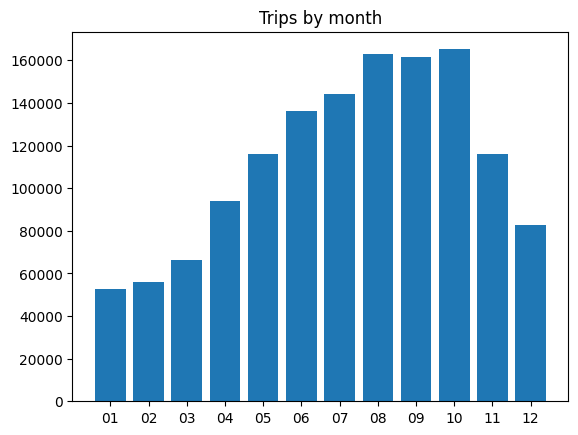

In [10]:
months = [ '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
plt.title('Trips by month')
month_count=[]
for m in months:  
        test = cd[ (cd['Start Time'].str[5:7] == m) ]
        month_count.append(len(test))
plt.bar(months, month_count)
plt.show()

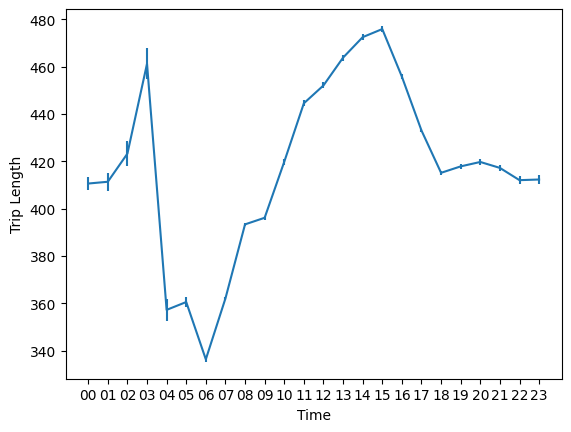

In [12]:
cd1=cd[cd['Trip Duration']<1440]
trip_duration= []
trip_error = []
for t in hours_uq:
    test = cd1[(cd1['Start Time'].str[11:13] == t)]
    trip_duration.append(test['Trip Duration'].mean())
    std_err = test['Trip Duration'].std() / np.sqrt(len( test['Trip Duration']))
    trip_error.append(std_err)


plt.errorbar(hours_uq, trip_duration, yerr=trip_error)
plt.xlabel('Time')
plt.ylabel('Trip Length')
plt.show()

10.0


In [13]:
#print(Cat[3:7])
s_stat = cd[Cat[3:7]].rename(columns={Cat[3]: "ID",Cat[4]: "Name", Cat[5]: "Latitude", Cat[6]: "Longitude"})
e_stat = cd[Cat[7:11]].rename(columns={Cat[7]: "ID",Cat[8]: "Name", Cat[9]: "Latitude", Cat[10]: "Longitude"})

stations = (
    pd.concat([s_stat,e_stat])
    .drop_duplicates()
    .set_index('ID')
    .sort_index()
)

stations

,Name,Latitude,Longitude
ID,,,
79.0,Franklin St & W Broadway,40.719116,-74.006667
116.0,W 17 St & 8 Ave,40.741776,-74.001497
127.0,Barrow St & Hudson St,40.731724,-74.006744
128.0,MacDougal St & Prince St,40.727103,-74.002971
146.0,Hudson St & Reade St,40.716250,-74.009106
...,...,...,...
3694.0,Jackson Square,40.711130,-74.078900
3709.0,W 15 St & 6 Ave,40.738046,-73.996430
3750.0,Forrest Tech Shop (parts testing),40.703006,-73.932077


In [14]:
# cd['Start Station Name'].value_counts()['Jackson Square	']
station_start_count = []
station_end_count = []
for station_name in stations['Name']:
    station_name_with_tab = station_name + '\t'
    station_name_cleaned = station_name_with_tab.strip()  # Remove leading and trailing whitespace
    #print(f"Checking station name: '{station_name_cleaned}'")
    s_count = cd['Start Station Name'].value_counts().get(station_name_cleaned, 0)
    station_start_count.append(s_count)
    e_count = cd['End Station Name'].value_counts().get(station_name_cleaned, 0)
    station_end_count.append(e_count)


print(station_start_count)
print(station_end_count)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 66790, 35602, 37206, 158174, 39064, 1167, 730, 2379, 3051, 29868, 12039, 27470, 73402, 73402, 8233, 2701, 0, 9353, 41245, 588, 6448, 61964, 84199, 23233, 11803, 19696, 35686, 16387, 40816, 10472, 37951, 32806, 3637, 0, 525, 643, 10082, 0, 17227, 0, 0, 0, 0, 0, 38796, 8068, 25052, 27754, 317, 27820, 20743, 114, 25521, 36648, 4221, 22698, 20557, 9014, 7156, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 104, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7813, 6988, 0, 0, 0, 0, 0, 18474, 32058, 14169, 0, 0, 3397, 5975, 5658, 10494, 0, 1398, 0, 0, 1563, 9027]
[1, 1, 3, 3, 5, 1, 66, 9, 1, 1, 10, 9, 4, 2, 3, 7, 2, 1,

In [15]:
stations['Start Count'] = station_start_count
stations['End Count'] = station_end_count
stations1= stations[(stations['Start Count']>10000) | (stations['End Count']>10000)  ]
stations1.head()
largestationlist = stations1['Name'].to_list()
print(len(largestationlist))

38


In [16]:
stations

,Name,Latitude,Longitude,Start Count,End Count
ID,,,,,
79.0,Franklin St & W Broadway,40.719116,-74.006667,0,1
116.0,W 17 St & 8 Ave,40.741776,-74.001497,0,1
127.0,Barrow St & Hudson St,40.731724,-74.006744,0,3
128.0,MacDougal St & Prince St,40.727103,-74.002971,0,3
146.0,Hudson St & Reade St,40.716250,-74.009106,0,5
...,...,...,...,...,...
3694.0,Jackson Square,40.711130,-74.078900,1398,1234
3709.0,W 15 St & 6 Ave,40.738046,-73.996430,0,1
3750.0,Forrest Tech Shop (parts testing),40.703006,-73.932077,0,4


In [30]:
for s in largestationlist:
    station_name_with_tab = s + '\t'
    station_name_cleaned = station_name_with_tab.strip()  # Remove leading and trailing whitespace

    s_count = cd['Start Station Name'].value_counts().get(station_name_cleaned, 0)

In [17]:
#    source = []
#    target = []
#    for s in range(len(largestationlist)):
#        for t in range(len(largestationlist)):
#        source.append(largestationlist[s])
#        target.append(largestationlist[t])
#
 #   value = []
 #   for i in range(len(largestationlist)):
  #      start = source[i]
#        end = target[i]
#        v = len(cd[(cd['Start Station Name'] == start) & (cd['End Station Name'] == end)])
#        value.append(v)
#    print(value)

#    link = dict(source = source, target = target, value = value)
#    data = go.Sankey(link = link)

 #   fig = go.Figure(data)
  #  fig.show()



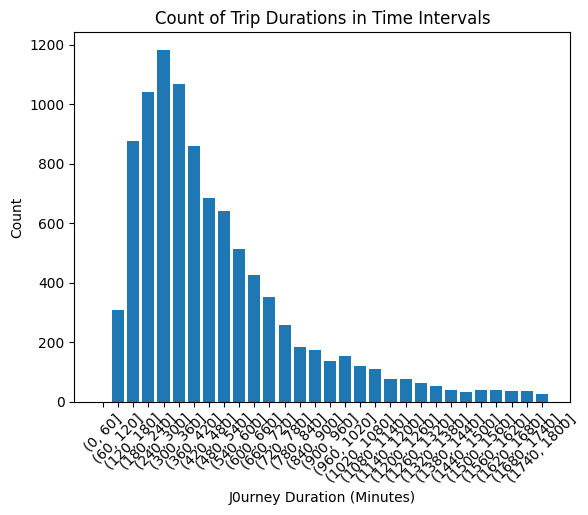

In [29]:
cd2 = cd[cd['Trip Duration'] < 1000000].iloc[1:10000]
#time_intervals = [0, 60, 300, 600, 1200, 1800, 6000, 12000]

time_intervals = []
for i in range(31):
    x=i*60
    time_intervals.append(x)
#time_intervals.append(6000)

# Categorize 'Trip Duration' into time intervals
cd2['Time Interval'] = pd.cut(cd2['Trip Duration'], bins=time_intervals)
# Count the occurrences in each time interval
counts = cd2['Time Interval'].value_counts().sort_index()
#counts = pd.cut(cd2['Trip Duration'], bins=time_intervals).value_counts()

plt.bar(x=counts.index.astype(str), height=counts)
plt.xlabel('J0urney Duration (Minutes)')
plt.ylabel('Count')
plt.title('Count of Trip Durations in Time Intervals')
plt.xticks(rotation=45)
plt.show()
